## **Market Basket Analysis for Marketing**


## Abstract


This lab is dedicated to performing the market basket analysis based on the dataset which belongs to "The Bread Basket", a bakery located in Edinburgh. The dataset has 20507 entries, over 9000 transactions, and 4 columns.


## Introduction


All modern companies, including online stores, analyze customer transactions and use them to form a market basket, which is actually a set of popular products that are bought together.
This basket can be used for planning marketing campaigns, in particular to create recommendations for shopping, product range, placement on supermarket shelves or making promotional offers.

Market Basket Analysis is a powerful marketing tool for turning a huge number of customer transactions into simple, easy-to-visualize rules used to promote a product and build sales recommendations.

In this lab, we will learn to perform the analysis of the market basket using both classical methods of data visualization and the Apriori algorithm, standard indicators, rules of association, aggregation and pruning. We will also learn how to visualize associative rules in the form of a dynamic graph.


## Materials and methods


In this lab, we will learn how to download data, pre-prepare it, perform basic market basked analysis, build associative rules and visualize them.
This lab consists of the following steps:
* Download and pre-preparation data - download and change of a DataSet structure necessary for market basket analysis.
* Data Visualizations - preliminary market basket analysis.
* Association Rule - construction and analysis of associative rules.
* Visualization of Association Rules - plotting a dynamic graph that reflects the associative rules.


The statistical data was obtained from the https://www.kaggle.com/mittalvasu95/the-bread-basket. This DataSet released under CC0: Public Domain license that allow of encouraging free re-use of its data, both for non-commercial and commercial purposes. 


## Prerequisites
* [Python](https://www.python.org) - intermediate level
* [Pandas](https://pandas.pydata.org) - intermediate level 
* [SeaBorn](https://seaborn.pydata.org) - intermediate level
* [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) - intermediate level
* [pyvis](https://pyvis.readthedocs.io/en/latest/) - basic level


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.csv files
* Create new and recalculate values of existing columns
* Transform a DataSet of transactions into a market basket DataSet
* Visualize data with seaborn
* Produce Association rules
* Analyze market basket
* Visualize graph of association rules


## Import Libraries/Define Auxiliary Functions


**Running outside Skills Network Labs.** This notebook was tested within Skills Network Labs. Running in another environment should work as well, but is not guaranteed and may require different setup routine.


Libraries such as Pandas, MatplotLib, SeaBorn, mlxtend and pyvis should be installed.


In [1]:
# conda install -c conda-forge pandas

In [2]:
# conda install -c conda-forge matplotlib

In [3]:
# conda install -c conda-forge seaborn 

In [4]:
# conda install -c conda-forge mlxtend 

In [5]:
# conda install -c conda-forge pyvis

## Download and pre-preparation of data


Some libraries should be imported before you can begin.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pyvis.network import Network
import datetime as dt
import numpy as np

### Download and pre-preparation


Let's download the data of customer transactions from a csv file.


In [7]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8UEN/bread%20basket.csv")
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


Let's study the DataSet. As you can see, the DataSet consists of 20507 rows and 5 columns. 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


As you can see, the first column of the DataSet has int64 type. All other are of object type. 
The DataSet has the following columns:

1. Transaction: the transaction id which is unique for each order
2. Item: a list of items to be ordered/placed by customer
3. date_time: the date and time of the transaction. 
4. period_day: the period of the day when a customer ordered/placed
5. weekday_weekend: is the day is weekend (sat or sun) or a weekday.

As you can see, first of all we need to change the data type of the date_time column.


In [9]:
df['date_time']=pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


/var/folders/vs/f82r1hg55sx473qy96cyw20m0000gn/T/ipykernel_86670/3119678500.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


We should add some new columns for basic visual market basket analysis.

To analyse purchases dynamics during different time period, we should split date_time columns into time and hours.


In [10]:
df['time']=df['date_time'].dt.time
df['hour']=df['date_time'].dt.hour

To analyse the dynamics of purchases during the year, we should add columns with month numbers and their names.


In [11]:
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

Similarly, to analyse weekly purchases, we need to highlight the days of the week and their names.


In [12]:
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Let's analyse the final DataSet:


In [13]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,09:58:00,9,10,October,30,6,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
 5   time             20507 non-null  object        
 6   hour             20507 non-null  int32         
 7   month            20507 non-null  int32         
 8   month name       20507 non-null  object        
 9   day              20507 non-null  int32         
 10  weekday          20507 non-null  int32         
 11  weekday name     20507 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 1.6+ MB


As you can see, we have 11 columns with all necessary information for preliminary visual market basket analysis.


## Data Visualizations


Let's analyze top 20 most popular purchases. 


In [15]:
popular = df['Item'].value_counts()
(df['Item'].value_counts(normalize=True)*100).head(20)

Item
Coffee           26.678695
Bread            16.213976
Tea               6.997611
Cake              4.998293
Pastry            4.174184
Sandwich          3.759692
Medialuna         3.003852
Hot chocolate     2.877066
Cookies           2.633247
Brownie           1.848149
Farm House        1.823767
Muffin            1.804262
Alfajores         1.799386
Juice             1.799386
Soup              1.667723
Scone             1.594577
Toast             1.550690
Scandinavian      1.350758
Truffles          0.941142
Coke              0.902131
Name: proportion, dtype: float64

/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


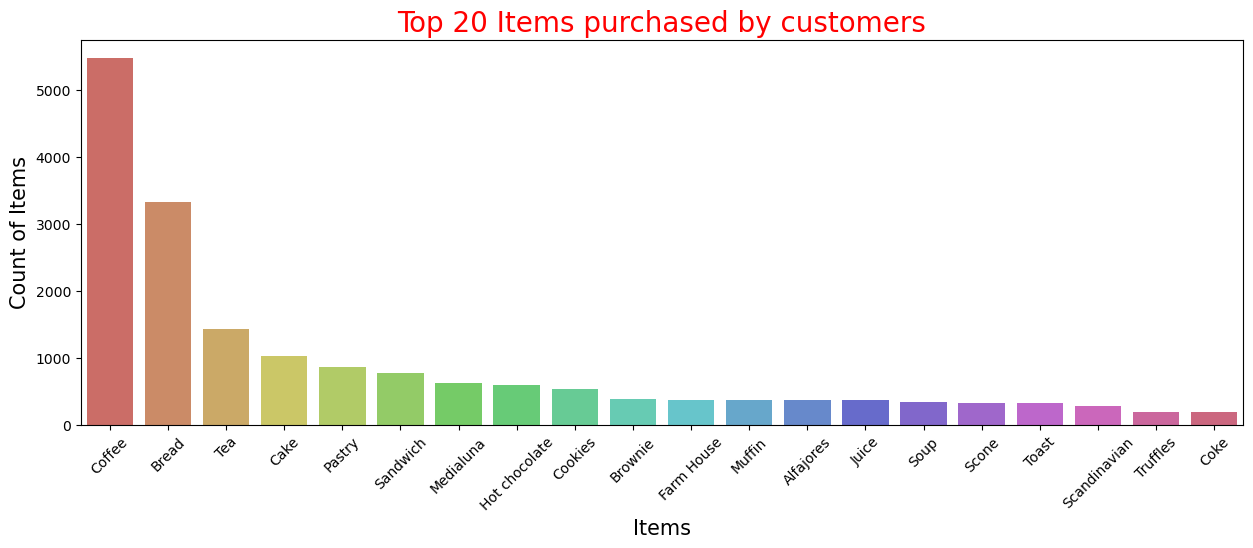

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red', size = 20)
plt.show()

As you can see, the most popular (26%) of purchases is Coffee, the next is (16%) Bread, then goes Tea (6.99%).


Let's analyze the dynamics of monthly purchases. For correct sorting, we need to group the DataSet by month number but display on the graph by month name.


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


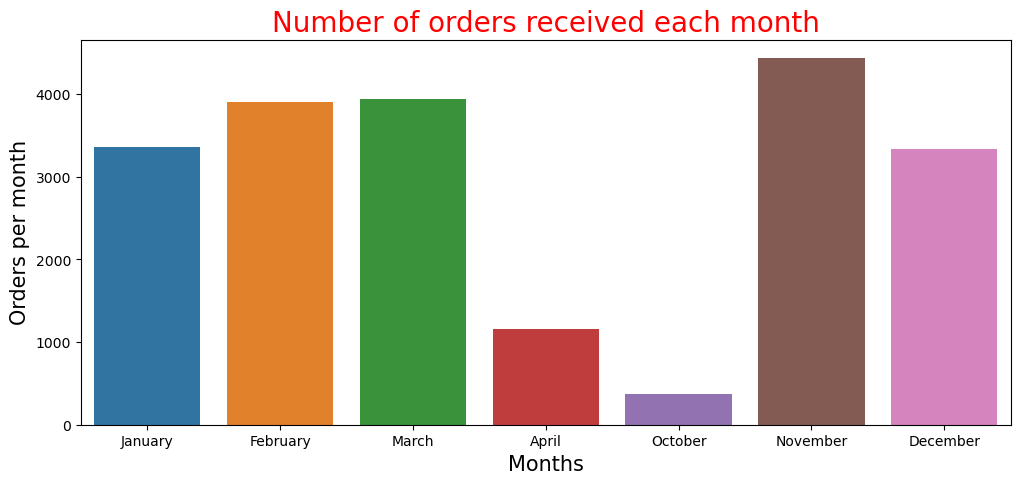

In [17]:
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran[['month name', 'Transaction']], x = "month name", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'red', size = 20)
plt.show()

As you can see, the largest number of purchases corresponds to March and November. Also, the most active buyers are in winter. In summer and early autumn, activity is the lowest.


Let's analyze monthly purchases for the six most popular products.


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Dep

/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Dep

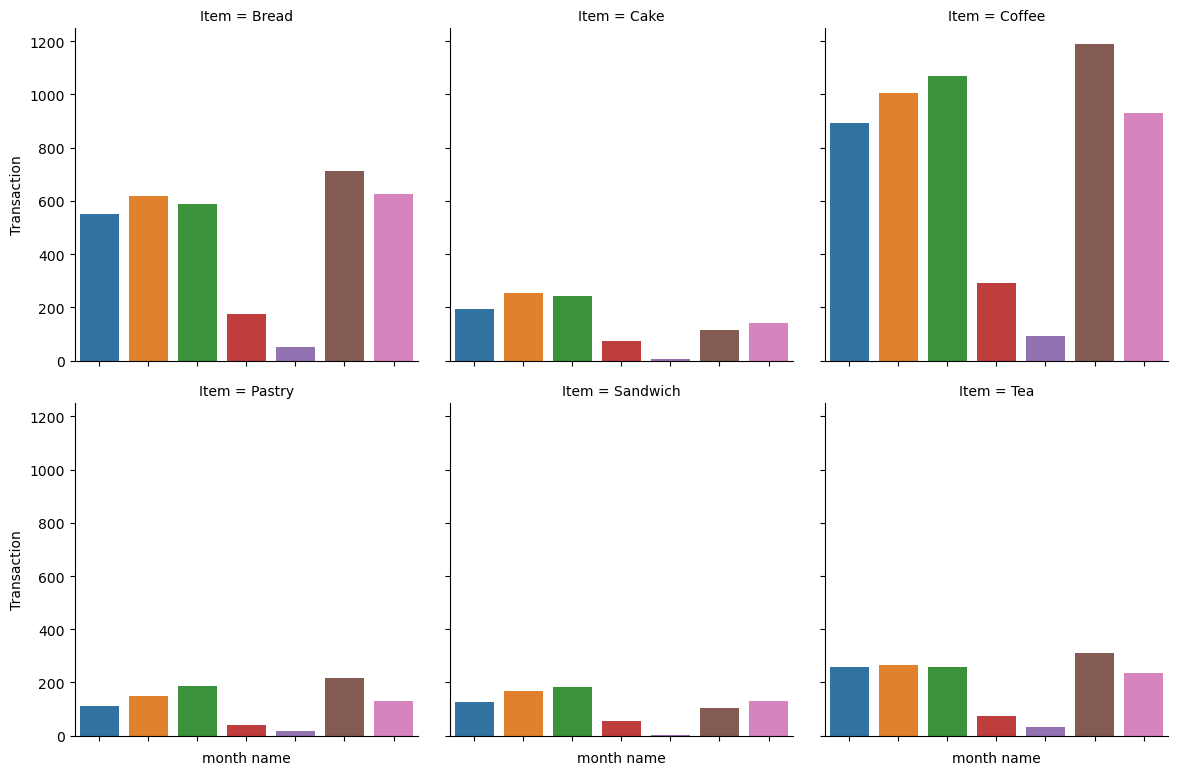

In [18]:
monthTranTransaction = df[df.Item.isin(popular.head(6).index)].groupby(['month','month name','Item'])['Transaction'].count().reset_index()

ax = sns.catplot(x="month name", y="Transaction",
                  col="Item",
                 data=monthTranTransaction, kind="bar",
                 height=4,  col_wrap=3)
ax.set_xticklabels(rotation=45)

Let's analyze the weekly activity. 


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


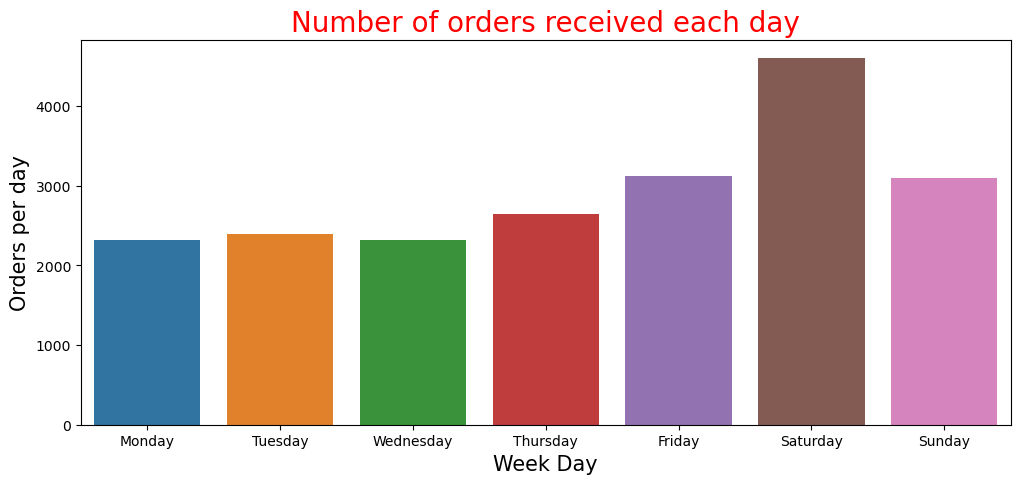

In [19]:

weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = weekTran[['weekday name', 'Transaction']], x = "weekday name", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'red', size = 20)
plt.show()

As you can see from the plot, buyers are active throughout the week. There are no days with no purchases. You can see that the maximum number of purchases falls upon Saturday.

Let's analyze similarly for the six most popular products


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Dep

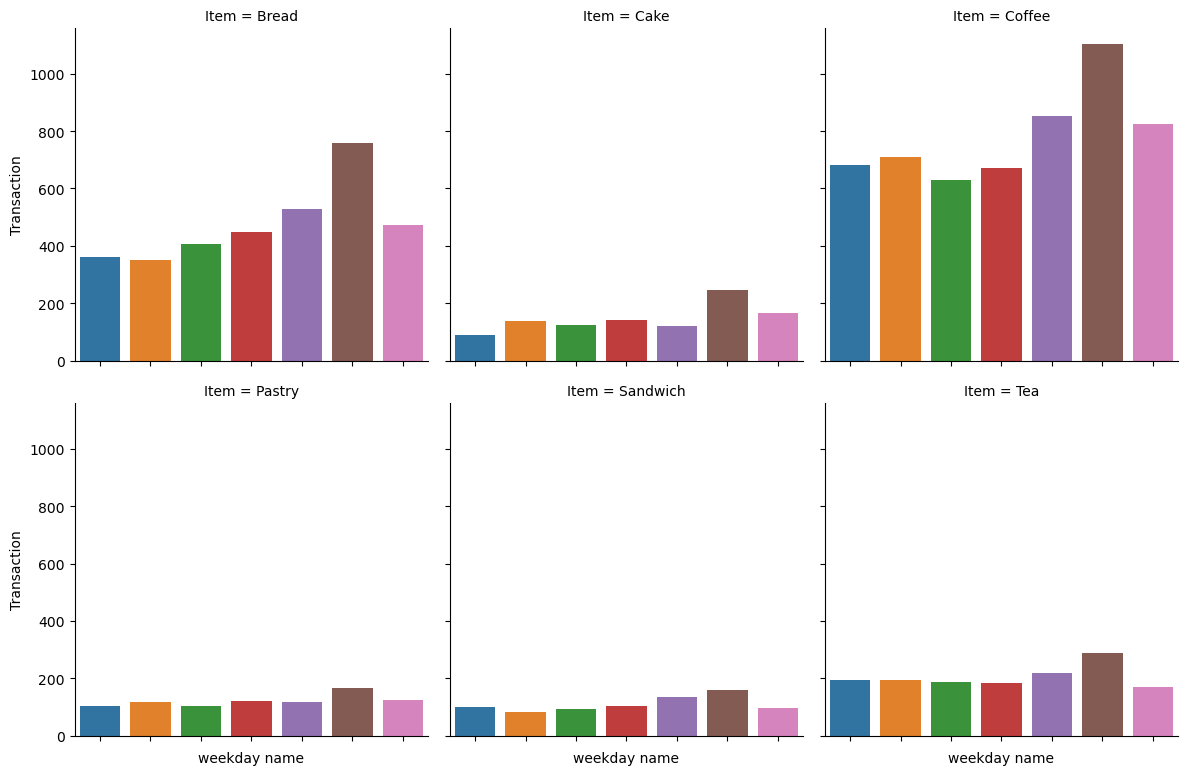

In [20]:
weekTran = df[df.Item.isin(popular.head(6).index)].groupby(['weekday','weekday name', 'Item'])['Transaction'].count().reset_index()

ax = sns.catplot(x="weekday name", y="Transaction",
                  col="Item",
                 data=weekTran, kind="bar",
                 height=4,  col_wrap=3)
ax.set_xticklabels(rotation=45)

Let's analyze the share of purchases on weekends and weekdays.


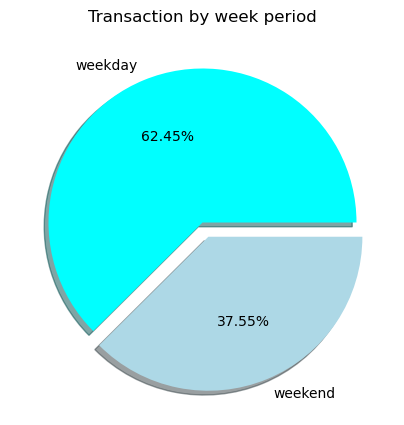

In [21]:
size = df['weekday_weekend'].value_counts()
labels = size.index.values
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Transaction by week period')
plt.show()

You can see that 62% of purchases are made on weekdays and 37% are made at the weekend.


Similar to the exercise from the first lab, let's build pie charts for the four most popular products.


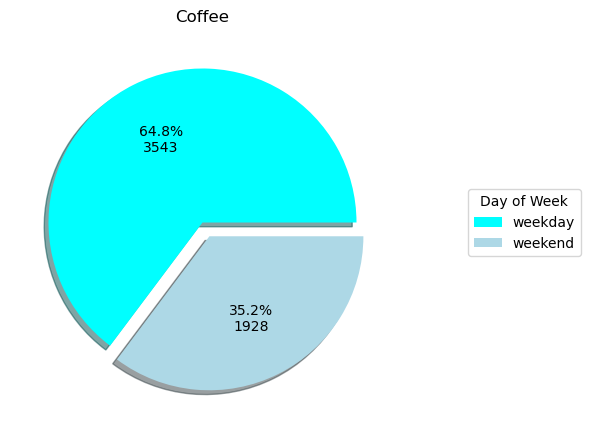

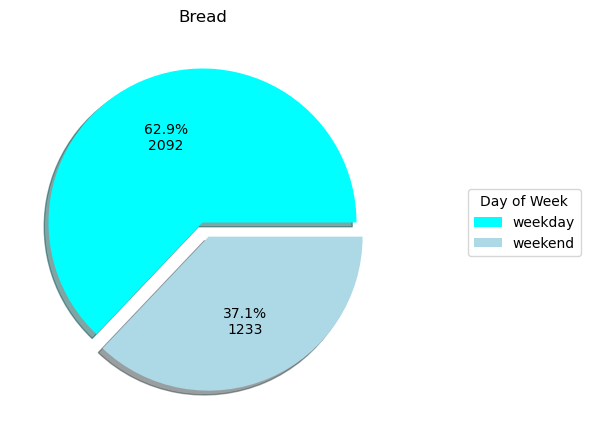

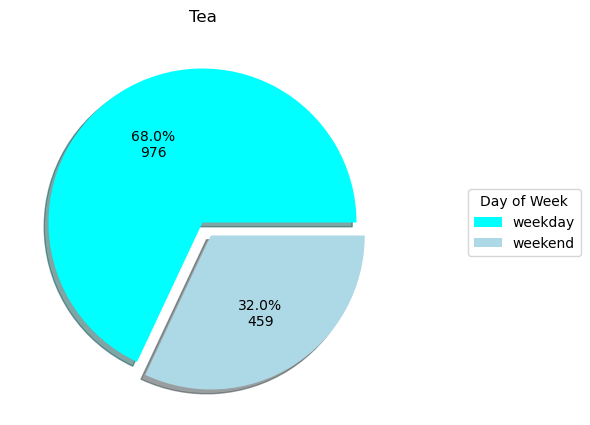

In [22]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)

size = df[df.Item.isin(popular.head(6).index)]
size = pd.crosstab(size['weekday_weekend'],
              size['Item'])
# size
labels = size.index.values
colors = ["cyan", "lightblue"]


for e in popular.head(3).index:
    plt.figure(figsize=(12,5))
    dt = size[e]
    explode = [0, 0.1]
    plt.pie(dt, colors = colors, explode = explode, shadow = True, 
            autopct=lambda pct: func(pct, dt.values))

    plt.title(e)
    plt.legend(labels = labels, title="Day of Week",
          loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

It is also interesting to study the activity of consumers during the day.


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


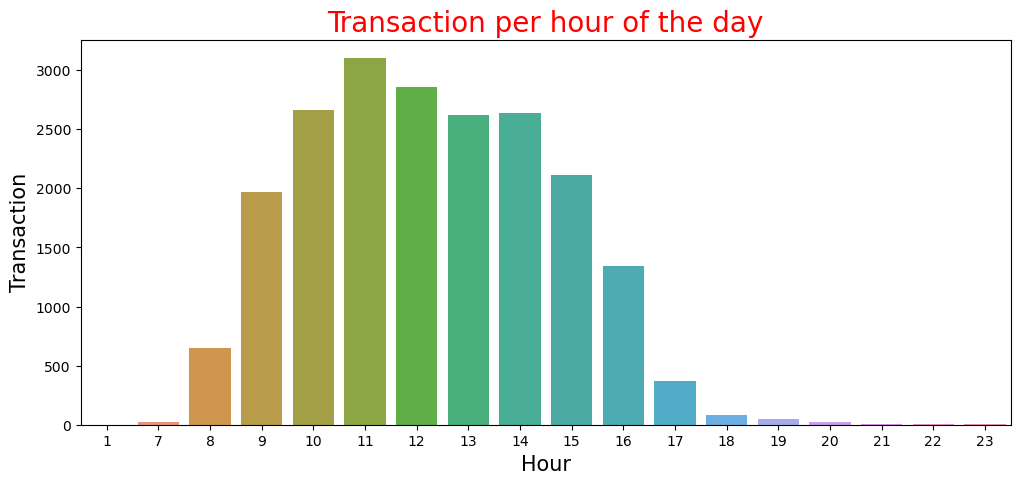

In [23]:
coutbyhour=df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=coutbyhour, x='hour', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

It is clearly seen that consumers become the most active starting from 9 in the morning to 4 in the evening.


Let's analyze the activity of buyers during parts of the day. This information is the initial DataSet. All you need to do is to add your own sort order to display the graph columns correctly.


/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramcharansatyasaitejapolisetti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


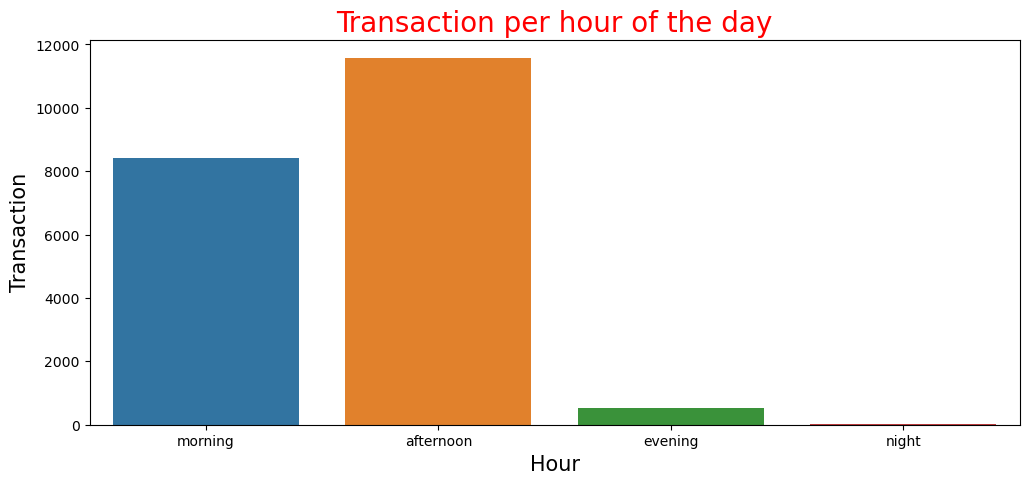

In [24]:
coutbyweekday=df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]
coutbyweekday.sort_values("dayorder",inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(data=coutbyweekday, x='period_day', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

The graph confirms that buyers become most active during the afternoon.


## Association Rules


Defining the relationship between purchases is necessary to build association rules. To do this, it is necessary to transform the transaction DataSet into a special table. Columns of this table contain types of purchases and rows are transactions. Cells of this table should be bool (true/false). There are two most common ways to do this.


### Way 1. Pivot table


This way involves the use of classical pandas methods like pivot_table and group_by.

First of all, we group rows into transactions:


In [25]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


Then transform this DataSet by pivot_table into a necessary market basket structure:


In [26]:
basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we should change non-zero data to True and zero data to False:


In [27]:
def encode_units(x): 
    if(x==0): 
        return False
    if(x>0): 
        return True
    
basket_sets = basket.applymap(encode_units)
basket_sets

/var/folders/vs/f82r1hg55sx473qy96cyw20m0000gn/T/ipykernel_86670/3229151556.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This is a necessary market basket DataSet that contains information about 9465 clients and 94 types of purchases.


### Way 2. Using mlxtend framework


The classic machine learning library scikit-learn does not contain association rules functions. That's why we will use the **[mlxtend](http://rasbt.github.io/mlxtend/)** (machine learning extensions) framework. It is a Python library of useful ML tools.

First of all, we should create a list of transactions each of which is a lists of purchases.


In [28]:
transactions=[]
for item in df['Transaction'].unique():
    lst=list(set(df[df['Transaction']==item]['Item']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Pastry', 'Coffee'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian']]

Then we can easily get a market basket DataSet using **[TransactionEncoder()](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/#transactionencoder)**.


In [29]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
basket_sets_2 = pd.DataFrame(encodedData, columns=te.columns_)
basket_sets_2

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As you can see, we got the same DataSet.

Now when the data is structured properly, we can generate frequent item sets for association rule mining that have an appropriate support (1% in our case) using **[apriori()](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)**.

Apriori is a popular algorithm  for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.


In [30]:
frequentItems= apriori(basket_sets, use_colnames=True, min_support=0.01)
frequentItems.sort_values("support", ascending=False)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
...,...,...
11,0.010565,(Hearty & Seasonal)
20,0.010460,(Salad)
30,0.010354,"(Alfajores, Bread)"
58,0.010037,"(Bread, Cake, Coffee)"


As you can see, bare Coffee is chosen in 48% of cases. Coffee and Bread - in 9%. Bare salad - in 1%. This list is a necessary list for creating association rules using the function **[association_rules()](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/association_rules/#association_rules)** that generates a DataFrame of association rules including the metrics scores.


Rule generation is a common task in the mining of frequent patterns. An association rule is an implication expression of the form X→Y, where X and Y are disjoint itemsets. A more concrete example based on consumer behaviour would be {Coffee}→{Bread}
 suggesting that people who buy Coffee are also likely to buy Bread. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation makes use of the confidence and lift metrics.


### Metrics


The currently supported metrics for evaluating association rules and setting selection thresholds are listed below. Given a rule "A → C", A stands for antecedent and C stands for consequent.


_Support_

The support metric is defined for itemsets, not association rules. The table produced by the association rule mining algorithm contains three different support metrics: 'antecedent support', 'consequent support', and 'support'. Here, 'antecedent support' computes the proportion of transactions that contain the antecedent A, and 'consequent support' computes the support for the itemset of the consequent C. The 'support' metric then computes the support of the combined itemset A∪C - note that 'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support').

Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if its support is larger than a specified minimum-support threshold. Note that in general, due to the downward closure property, all subsets of a frequent itemset are also frequent.


_Confidence_

The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.


_Lift_

The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.


_Leverage_

Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. A leverage value of 0 indicates independence.


_Conviction_

A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.


In [31]:
rules = association_rules(frequentItems, metric="confidence", min_threshold=0.2)
rules.sort_values('confidence', ascending = False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
22,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
20,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


This data set contains all possible causal relationships.  

Let's see all rules that have lift>1:


In [32]:
rules[rules["lift"]>1].sort_values("support",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


Imagine a situation where a customer buys a Cake. Let's predict what else they can buy:


In [33]:
rules[rules['antecedents'] == frozenset({'Cake'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947


As you can see, there are three possible options:
1. Coffee - 47%
2. Tea - 14%
3. Bread - 3%


This can be a recommendation of which product should be placed closer to or farther from the cake on the shelves. Depending on the strategy of the supermarket.


Let's analyse which products are bought together the most frequently.


In [34]:
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems[frequentItems["antecedent_len"]>1].sort_values(by=["antecedent_len","support"], ascending=False)

,support,itemsets,antecedent_len
59,0.011199,"(Bread, Pastry, Coffee)",3
58,0.010037,"(Bread, Cake, Coffee)",3
60,0.010037,"(Cake, Coffee, Tea)",3
34,0.090016,"(Bread, Coffee)",2
42,0.054728,"(Cake, Coffee)",2
55,0.049868,"(Coffee, Tea)",2
50,0.047544,"(Pastry, Coffee)",2
51,0.038246,"(Sandwich, Coffee)",2
48,0.035182,"(Medialuna, Coffee)",2
46,0.029583,"(Hot chocolate, Coffee)",2


The confidence for a very frequent consequent is always high even if there is a very weak association. So, this doesn't give us a clearer picture. Here, coffee is by far the most frequent item and the best seller. It can therefore be recommended anyway with every other item. So, we can drop the rules recommending coffee to get a clearer picture of the real unknown rules generated from the data.


In [35]:
index_names = rules['consequents'] == frozenset({'Coffee'})
refinedRules = rules[~index_names].sort_values('lift', ascending=False)
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index()
refinedRules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhangs_metric
0,30,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.509401
1,12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.420538
2,25,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.309050
3,8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.036980
4,0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.133570
5,7,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.173062
6,2,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.183536
7,5,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.195651
8,9,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.291561
9,28,"(Pastry, Coffee)",(Bread),0.047544,0.327205,0.011199,0.235556,0.719901,-0.290026


Now the relationship between other types of goods is visible more clearly, such as Cake -> Tea or (Tea and Coffee) -> Cake


## Visualization of Association Rules


An important issue of analysis and understanding of associative rules is the possibility of their visualization. There are several approaches to this. However, the most clear and obvious is the use of the library **[pyvis](https://pyvis.readthedocs.io/en/latest/)**. This is a special framework for Interactive network visualizations.


First of all, we should create a pyvis **[Network()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=Network#pyvis.network.Network)**. The Network class is the focus of this library. All pyvis functionality should be implemented off of a Network instance.


In [36]:
Basket_Network = Network(height="1000px", width="1000px", directed=True, notebook=True)

Then we should choose the type of pyvis network. There are several types such as: **[force_atlas_2based()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[barnes_hut()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[hrepulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[repulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[etc](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**.


In [37]:
# Basket_Network.force_atlas_2based()
# Basket_Network.barnes_hut()
# Basket_Network.hrepulsion()
Basket_Network.repulsion()

Then we should create nodes (**[add_node()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=add_node#pyvis.network.Network.add_node)**) and eges (**[add_edge()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=add_edge#pyvis.network.Network.add_edge)**) between them for a pyvis graph based on rules:


In [38]:
Basket_Network_Data_zip=zip(rules["antecedents"],
                            rules["consequents"],
                            rules["antecedent support"],
                            rules["consequent support"],
                            rules["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

Then we should set the edges smooth (**[set_edge_smooth](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=set_edge_smooth#pyvis.network.Network.set_edge_smooth)**) and set the parameters of visualizations like **[toggle_hide_edges_on_drag](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=toggle_hide_edges_on_drag#pyvis.network.Network.toggle_hide_edges_on_drag)**.


In [39]:
Basket_Network.set_edge_smooth(smooth_type="continuous")
Basket_Network.toggle_hide_edges_on_drag(True)

The last step - we save the graph into a file and visualize it using **[save_graph()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=save_graph#pyvis.network.Network.save_graph)** and **[show()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=show#pyvis.network.Network.show)**.


In [40]:
Basket_Network.save_graph("Basket_Network1.html")
Basket_Network.show("Basket_Network1.html")

Basket_Network1.html


As you can see, the graph allows you to easily understand all races together. The width of lines show you the confidence of rule, the size of node indicate support.


Let's do the same for refinedRules:


In [41]:
Basket_Network2 = Network(height="1000px", width="1000px", directed=True, notebook=True)
Basket_Network2.repulsion()
Basket_Network_Data2_zip=zip(refinedRules["antecedents"],
                            refinedRules["consequents"],
                            refinedRules["antecedent support"],
                            refinedRules["consequent support"],
                            refinedRules["confidence"])


for i in Basket_Network_Data2_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network2.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network2.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network2.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

Basket_Network2.set_edge_smooth(smooth_type="continuous")
Basket_Network2.toggle_hide_edges_on_drag(True)
Basket_Network2.save_graph("Basket_Network2.html")
Basket_Network2.show("Basket_Network2.html")

Basket_Network2.html


## Conclusions


In this lab, we learned how to perform a market basket analysis based on the Bread Basket dataset from a bakery in Edinburgh, using both classical data visualization techniques and the Apriori algorithm, standard indicators, association rules, aggregation and trimming rules. We have learned to visualize association rules in the form of a dynamic graph.

Based on real data, we comprehensively analyzed the dynamics of purchases and most popular purchases with their support. We created and analyzed association rules. Based on them, we found the most popular products bought together. We learned to predict which products will be bought and to create recommendations for the location of products on supermarket shelves.
